
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1  Abre el archivo de datos y estudia la información general

In [1]:
# Cargar todas las librerias
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math

In [2]:
# Cargar los datos en un dataframe
df_games = pd.read_csv('/datasets/games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda que es muy importante analizar si hay duplicados o no en los datos. Puedes utilizar _duplicated().sum()_ para ver el número de duplicados.
    
Además, recuerda dejar comentarios sobre tus observaciones.

</div>

# Paso 2  Prepara los datos

In [3]:
# Convertimos los nombres a minusculas
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Se ha realizado el ajuste en el nombre de las columnas de forma correcta. 

</div>

In [4]:
# Convertimos los datos a los tipos necesarios

# Eliminamos los espacios al inicio y al final de los nombres
df_games['name'] = df_games['name'].str.strip() 

# Eliminadmos duplicados y transformamos la columna a tipo int
df_games = df_games.dropna(subset=['year_of_release'])
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

# Convertimos las filas con dato 'tbd' a valor nulo en la columna 'user_score'
# Convertimos la columna 'user_score' a tipo de dato numérico, ignoramos errores
df_games['user_score'].replace('tbd', np.nan, inplace=True)
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No comentas nada sobre los valores nulos. Nota que soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Los valores de Year_of_release se pueden cambiar a cero o eliminarse. Por su parte, no hay mucho que se puede hacer con los valores nulos de critic_score y user_score, los cuales se pueden dejar a null.

</div>

In [5]:
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


In [6]:
# Calcula las ventas totales 
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo calculando las ventas totales.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Otra forma de hacerlo es de la siguiente manera:

	data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

</div>

</div>

# Paso 3  Analiza los datos

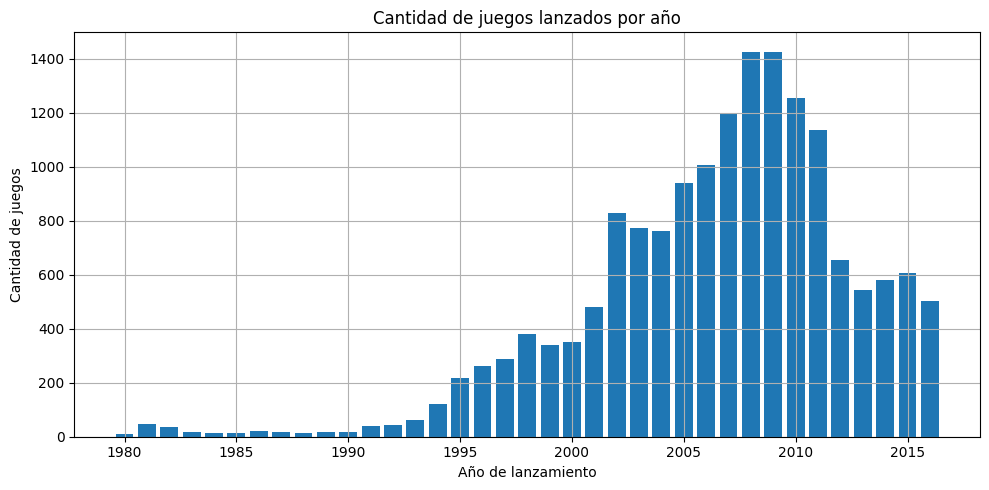

In [7]:
# Cantidad de juegos lanzados por año
 
# Contamos la cantidad de juegos por año y ordenamos por el año de forma descendente
games_by_year = df_games['year_of_release'].value_counts().dropna().sort_index()

# Creamos un gráfico para visuzalir los datos
plt.figure(figsize=(10,5))
plt.bar(games_by_year.index.astype(int), games_by_year.values)
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen análisis sobre el lanzamiento de los videojuegos. Además, el gráfico utilizado es excelente y las conclusiones se presentan claramente.

</div>

- Podemos observar que a partir de 2001 se presentan incrementos significativos en la cantidad de lanzamientos por año, siendo 2018 el pico más alto con un poco más de 1400 juegos.

- Para los años anteriores (antes de 1995) la cantidad es muy baja, esto pudiera deberse a una menor producción de la industria, así como una poca demanda por parte del consumidor.

- Otro aspecto importante a mencionar es que después de 2012 se sufre una caída muy considerable en las cantidad de juegos lanzados. 

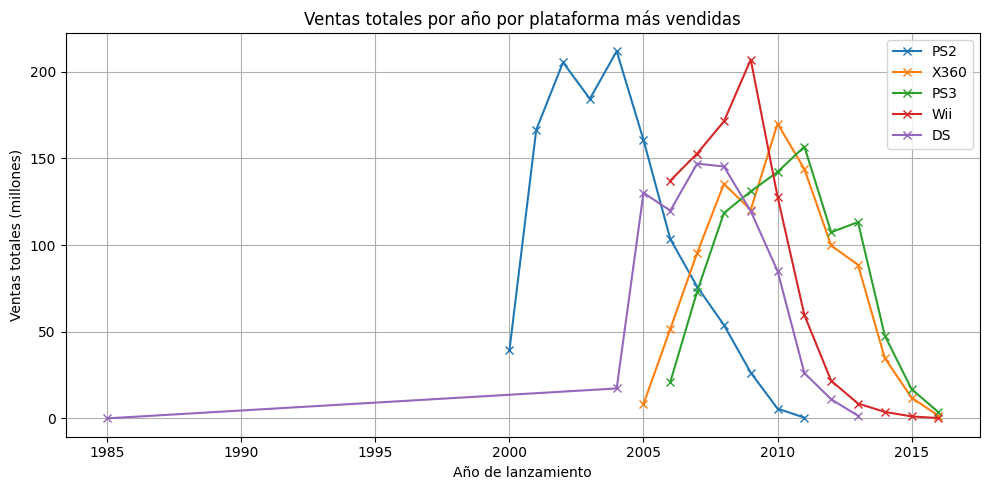

In [8]:
# Analisis para observar la variación de las ventas entre las distintas plataformas

# Agrupamos el df por plataforma y por el total de sus ventas
platforms_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionamos las 5 plataformas con las ventas más altas
top_platforms = platforms_sales.head(5).index.tolist()

# Filtramos el df con solo el top 5 de plataformas
filtered_df = df_games[df_games['platform'].isin(top_platforms)]
filtered_df = filtered_df.dropna(subset=['year_of_release'])
filtered_df['year_of_release'] = filtered_df['year_of_release'].astype(int) 

# Agrupamos por año y plataforma
platform_year_sales = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Hacemos un gráfico para visualizar los datos
plt.figure(figsize=(10,5))
for platform in top_platforms:
    data = platform_year_sales[platform_year_sales['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='x', label=platform)
    
plt.title('Ventas totales por año por plataforma más vendidas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen análisis sobre las ventas totales!

</div>

De este gráfico podemos concluir lo siguiente:

- Las plataformas recorren un plazo de entre 1 a 3 años para llegar a su auge de ventas.
- Suelen tener mantener sus ventas más altas por un plazo entre 4 a 6 años.
- Finalmente, las plataformas suelen desaparecer después de un plazo entre 3 a 4 años.

Datos para construir un modelo predictivo

1. Disponibilidad de los datos:
- El data set contiene datos de lanzamiento hasta 2016, entre los años 2012 y 2014 algunas plataformas desaparecen y otros emergen. Esto nos sugiere que algunas plataformas nuevas cuentan con datos hasta 2017.

- La mayor estabilidad de los datos está entre 2000 y 2016, también es el periodo con más actividad en la industria, por lo tanto considero que para predecir lo que pasará en 2017 es importante considerar las paltaformas activas en los últimos 5 a 10 años. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No es común utilizar datos de más de 2-3 años al hacer una proyección de ventas para el próximo año, incluso en negocios tradicionales. En la dinámica industria de los videojuegos, tomar intervalos de tiempo más largos debería evitarse, ya que definitivamente conducirá a rastrear tendencias obsoletas. Pero tampoco deberías tomar un período demasiado corto.

</div>

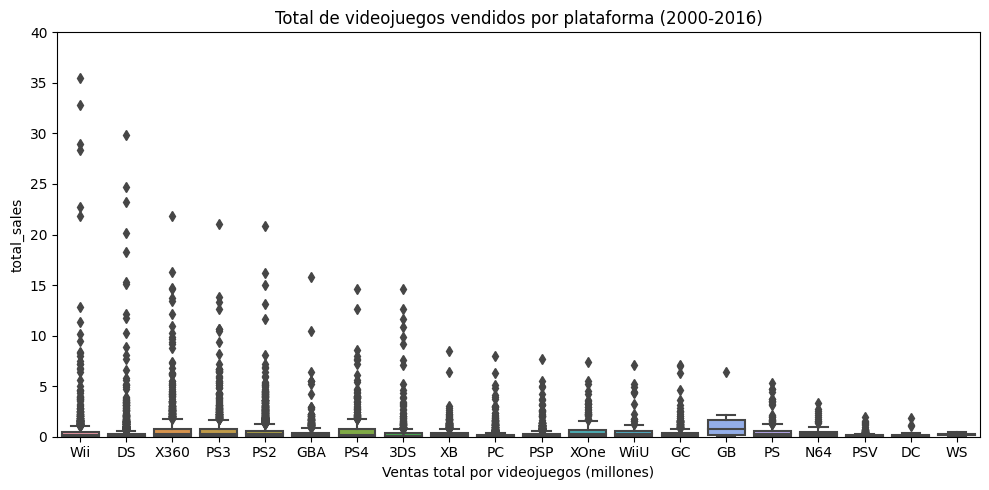

In [9]:
# Ventas globales de videojuegos por plataforma
# Filtramos los datos válidos para los años 2000 a 2006
filtered_year_df = df_games[(df_games['year_of_release'] >= 2000) & (df_games['year_of_release'] <= 2016)]

# Creamos el diagrama de caja
plt.figure(figsize=(10,5))
sns.boxplot(data=filtered_year_df, x='platform', y='total_sales')
plt.title('Total de videojuegos vendidos por plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.xlabel('Ventas total por videojuegos (millones)')
plt.ylim(0, 40)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aquí lo mejor es no mostrar los outliers para poder ver más claramente las cajas y poder realizar comparativas.

</div>

Considero si son significativas las diferencias en ventas?

- Mi respuesta es sí, plataformas como Wii, DS y PS2 muestran una mayor dispersión con algunos títulos que alcanzaron ventas muy altas.

- Otras plataformas como X360, PS3 tiene ventas más concentradas y bajas en promedio.

- Podemos observar que la media para la gran mayoría de las plataformas es muy similar, esta se encuentra muy cerca del millón de unidades vendidas, este dato nos puede sugerir que la gran mayoría de los títulos venden poco.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>


Los comentarios son muy buenos! Aunque podrías profundizar mucho más tu análisis.

Un **boxplot** (o diagrama de caja y bigotes) es una herramienta gráfica que permite visualizar la distribución de un conjunto de datos de manera eficiente. Sus principales beneficios son:

1. **Resumir la distribución de los datos** → Muestra la mediana, cuartiles y valores extremos de un conjunto de datos de forma compacta.
2. **Detectar outliers fácilmente** → Los valores atípicos quedan representados fuera de los "bigotes", facilitando su identificación.
3. **Comparar distribuciones** → Útil para analizar cómo varían los datos entre diferentes categorías o grupos.
4. **Mostrar asimetría y dispersión** → Permite observar si los datos están sesgados y qué tan dispersos están.
5. **Resistencia a valores extremos** → No se ve tan afectado por outliers como otras visualizaciones, como histogramas o medias.

</div>

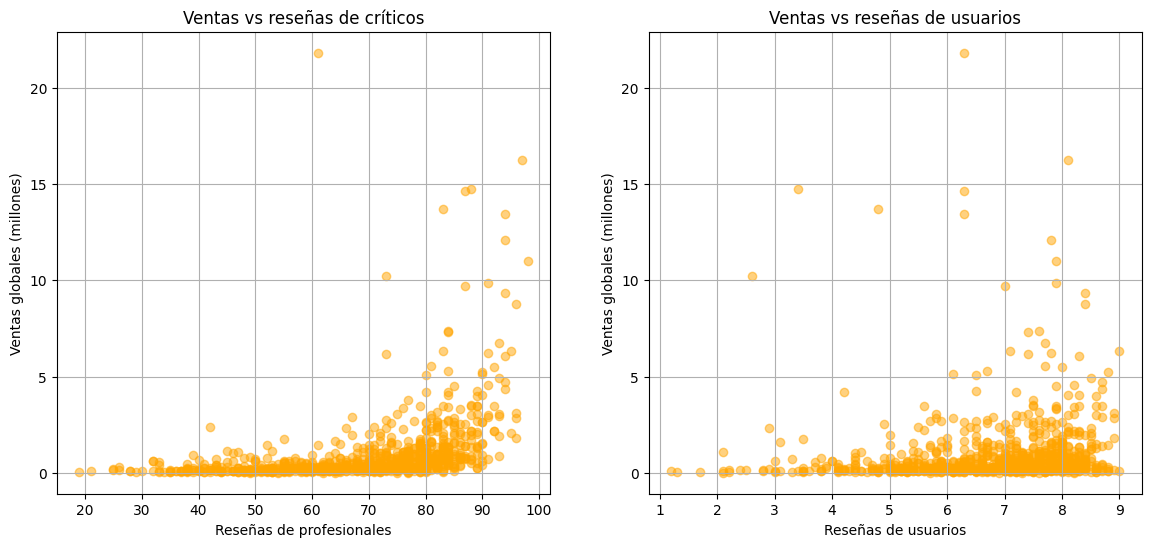

Correlación ventas vs reseñas críticos: 0.3889921155786253
Correlación ventas vs reseñas usuarios: 0.11027967172869052


In [10]:
# Analisis de relación entre las calificaciones de profesiones y usuarios a videojuegos contra volumen de ventas

# Filtramos datos de la plataforma seleccionada, en este caso 'x360'
df_x360 = df_games[(df_games['platform'] == 'X360')]

# Eliminamos filas con datos ausentes
df_x360 = df_x360.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Creamos gráfico para visualizar los datos
plt.figure(figsize=(14,6))

# Gráfico para ver la dispersión entre calificaciones de profesionales contra las ventas
plt.subplot (1,2,1) 
plt.scatter(df_x360['critic_score'], df_x360['total_sales'], alpha=0.5, color='orange')
plt.title('Ventas vs reseñas de críticos')
plt.xlabel('Reseñas de profesionales')
plt.ylabel('Ventas globales (millones)')
plt.grid()

# Gráfico para ver la dispersión entre calificaciones de usuarios contra las ventas
plt.subplot (1,2,2) 
plt.scatter(df_x360['user_score'], df_x360['total_sales'], alpha=0.5, color='orange')
plt.title('Ventas vs reseñas de usuarios')
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.tight_layout
plt.grid()
plt.show()

# Calculamos las correlaciones
critic_corr_x360 = df_x360['critic_score'].corr(df_x360['total_sales'])
user_corr_x360 = df_x360['user_score'].corr(df_x360['total_sales'])

print(f'Correlación ventas vs reseñas críticos: {critic_corr_x360}')
print(f'Correlación ventas vs reseñas usuarios: {user_corr_x360}')      


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Tal cual. Podemos ver una correlación positiva para las reseñas de los críticos, es decir, un puntaje más alto generalmente trae más ingresos. Sin embargo, la correlación entre el puntaje de los usuarios y los ingresos es casi cero, lo que significa que los ingresos por ventas no se ven muy afectados por la opinión de los usuarios.

</div>

Puntos a mencionar:

- Las reseñas de los críticos presentan una correlación moderada de un 39% con las ventas, esto pudiera sugerir una ligera porción de influencia en los consumidores al elegir un título.

- Por otro lado, la correlación entre las ventas con las reseñas de los usuarios es muy débil, apenas de un 11%. Esto infiere en que los consumidores suelen influenciarse más por lo que dicen los críticos para elegir un título.

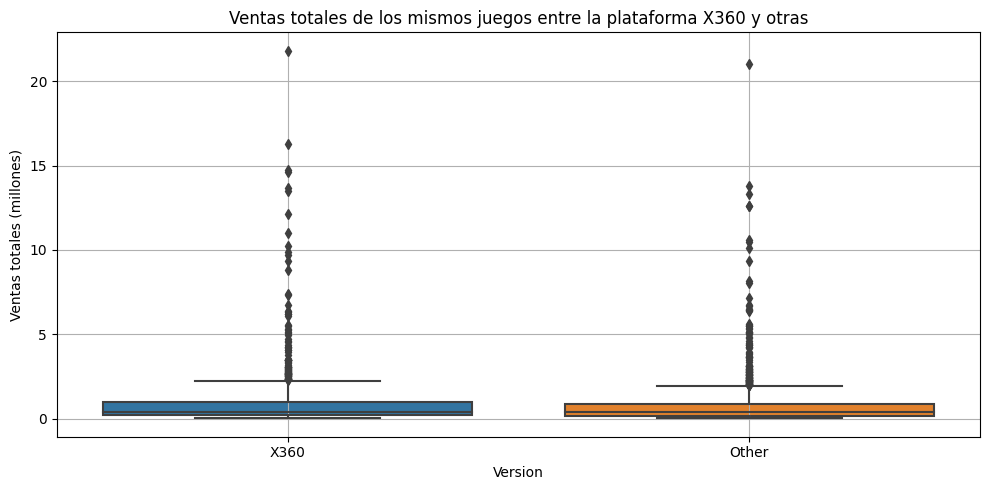

version
Other    0.790199
X360     0.991487
Name: total_sales, dtype: float64

In [11]:
# Comparamos la venta de los mismos juegos entre la plataforma X360 y otras

# Filtramos los juegos en X360
x360_games = df_games[(df_games['platform'] == 'X360')].copy()
x360_games = x360_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Obtenemos los nombres de los juegos filtrados
x360_game_names = x360_games['name'].unique()

# Buscamos los nombres de los juegos en otras plataformas
same_games = df_games[(df_games['name'].isin(x360_game_names)) & (df_games['platform'] != 'X360')]
same_games = same_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])
                       
# Creamos columna con valor categórico para mejor presentación de los datos
x360_games['version'] = 'X360'
same_games['version'] = 'Other'
    
# Combinamos los 2 bases de datos previo a realizar la visualización
merged_df = pd.concat([x360_games[['name', 'total_sales', 'critic_score', 'user_score', 'version']], 
                       same_games[['name', 'total_sales', 'critic_score', 'user_score', 'version']]])


# Creamos el gráfico para comparar
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='version', y='total_sales')
plt.title('Ventas totales de los mismos juegos entre la plataforma X360 y otras')
plt.xlabel('Version')
plt.ylabel('Ventas totales (millones)')
plt.grid()
plt.tight_layout()
plt.show()

merged_df.groupby('version')['total_sales'].mean()

Conclusiones:

- Los juegos lanzados en la plataforma X360 vendieron más en promedio que su contraparte en otras plataformas.

- Podemos ver en el caso de la plataforma X360 tiene una distribución un poco más amplia, por lo que algunos títulos pudieron llegar a los 2 millones, caso contrario en otras plataformas.

- Podríamos decir que la base de compradores de la plataforma X360 era más activa o algunos juegos presentaron quizá exclusivas o mejores características para ser jugados a diferencia de otras plataformas.

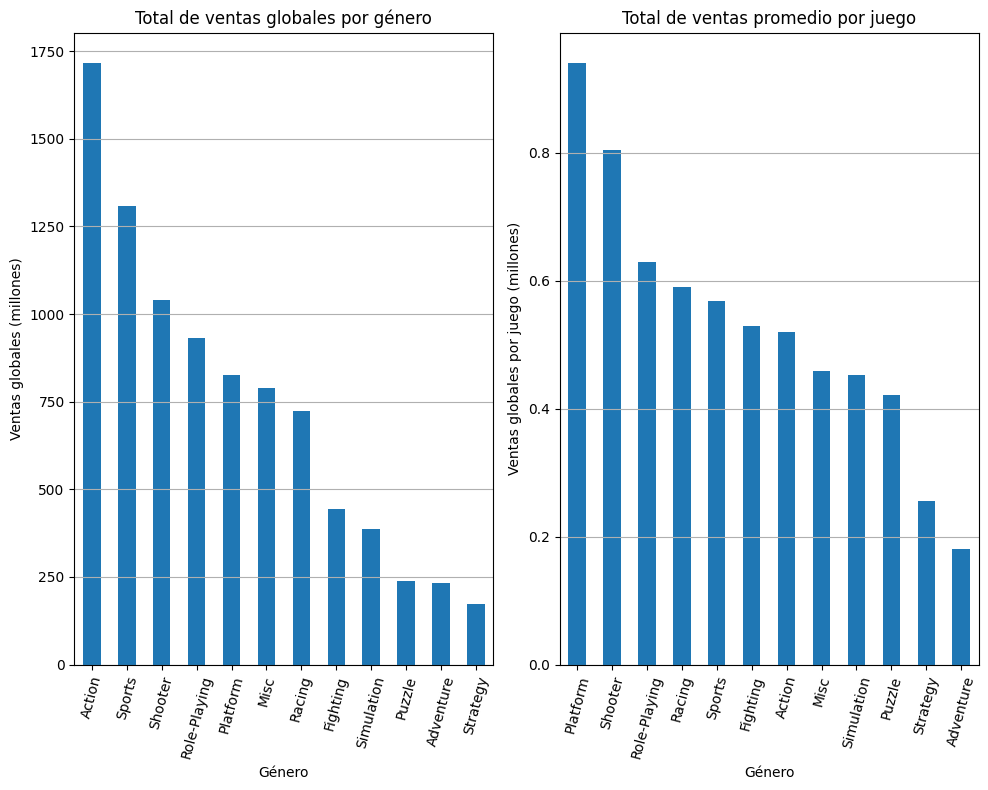

,mean,sum,count
genre,,,
Action,0.52,1716.52,3307
Sports,0.57,1309.67,2306
Shooter,0.80,1041.36,1296
Role-Playing,0.63,931.08,1481
Platform,0.94,825.55,878
Misc,0.46,790.29,1721
Racing,0.59,723.49,1226
Fighting,0.53,442.66,837
Simulation,0.45,387.96,857


In [12]:
# Analis de la distribución general de los juegos por género

# Eliminamos los valores nulos de la columna 'genre' que eran solo 2
genre_sales = df_games.dropna(subset=['genre'])

# Calculamos un resumen de las ventas por género
genre_summary = genre_sales.groupby('genre')['total_sales'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)

# Para el análisis realizaremos 2 gráficos 
# Gráfico de barras para ver las ventas totales por género
plt.figure(figsize=(10,8))
plt.subplot (1,2,1) 
genre_summary['sum'].plot(kind='bar')
plt.title('Total de ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=75)
plt.grid(axis='y')

# Gráfico de barras para ver ventas promedio
plt.subplot (1,2,2) 
genre_summary['mean'].sort_values(ascending=False).plot(kind='bar')
plt.title('Total de ventas promedio por juego')
plt.xlabel('Género')
plt.ylabel('Ventas globales por juego (millones)')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

genre_summary.round(2)


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>

Conclusiones:

- Los géneros Platform y Shooter se presentan como los más rentable, esto debido a que valores promedio de ventas por cada juego que tienen esos géneros son los más grandes.

- Podemos observar también que géneros como Action y Sports, aún cuando presentan unos totales de venta muy altos, nos dicen que su promedio de ventas por juego es no es significativo, dependen de lanzar muchos títulos con pocas ventas.

- Por último los 2 géneros menos rentables son Adventu y Strategy por lo que se deberían analizar estrategias para alzar estos géneros o en su caso reemplazarlos con otros más rentables.

# Paso 4.  Crear un perfil para cada región

In [60]:
# Identificar las 5 plataformas principales por ventas en cada región
# Identificar los 5 principales géneros por ventas en cada región

# Creamos una función para obtener el top 5 por región
def top_5_by_region(region, column):
    return(df_games.groupby(column)[region].sum().sort_values(ascending=False).head(5))

# Obtenemos el top 5 de plataformas por región
top_5_platforms_na = top_5_by_region('na_sales', 'platform')
top_5_platforms_eu = top_5_by_region('eu_sales', 'platform')
top_5_platforms_jp = top_5_by_region('jp_sales', 'platform')

# Obtenemos el top 5 de géneros por región
top_5_genres_na = top_5_by_region('na_sales', 'genre')
top_5_genres_eu = top_5_by_region('eu_sales', 'genre')
top_5_genres_jp = top_5_by_region('jp_sales', 'genre')

# Creamos un diccionario para presentar las variaciones entre las cuotas de mercado de las plataformas por region
platforms_comparison_df = pd.DataFrame({
    "Rank": [1, 2, 3, 4, 5],
    "NA_Platform": top_5_platforms_na.index.tolist(),
    "NA_Sales (mill.)": top_5_platforms_na.values.tolist(),
    "EU_Platform": top_5_platforms_eu.index.tolist(),
    "EU_Sales (mill.)": top_5_platforms_eu.values.tolist(),
    "JP_Platform": top_5_platforms_jp.index.tolist(),
    "JP_Sales (mill.)": top_5_platforms_jp.values.tolist(),
})

print(platforms_comparison_df)






   Rank NA_Platform  NA_Sales (mill.) EU_Platform  EU_Sales (mill.)  \
0     1        X360            595.74         PS2            332.63   
1     2         PS2            572.92         PS3            327.21   
2     3         Wii            486.87        X360            268.32   
3     4         PS3            390.13         Wii            258.32   
4     5          DS            380.31          PS            212.39   

  JP_Platform  JP_Sales (mill.)  
0          DS            175.02  
1          PS            139.78  
2         PS2            137.54  
3        SNES            116.55  
4         3DS            100.62  


De las conclusiones que podemos obtener:
- Nortemarica es liderado por la plataforma X360, mientras que en Europa domina la PS2, por otro lado en Japón la plataforma DS es la más popular. 

- Norteamérica es el mercado que presenta una cantidad considerablemente mayor en ventas a eu y jp. 

- Existen plataformas en común entre las 3 regiones, sin embargo, es importante destacar que no se encuentran en la misma posición. Esto nos puede dar una idea de los distintos tipos de consumo que existen en las regiones.


In [43]:
# Creamos un diccionario para presentar las variaciones entre las cuotas de mercado de los géneros por region
genres_comparison_df = pd.DataFrame({
    "Rank": [1, 2, 3, 4, 5],
    "NA_Genre": top_5_genres_na.index.tolist(),
    "NA_Sales (mill.)": top_5_genres_na.values.tolist(),
    "EU_Genre": top_5_genres_eu.index.tolist(),
    "EU_Sales (mill.)": top_5_genre_eu.values.tolist(),
    "JP_Genre": top_5_genre_jp.index.tolist(),
    "JP_Sales (mill.)": top_5_genre_jp.values.tolist(),
})

print(genres_comparison_df)

   Rank  NA_Genre  NA_Sales (mill.) EU_Genre  EU_Sales (mill.)      JP_Genre  \
0     1    Action            863.17   Action            510.99  Role-Playing   
1     2    Sports            671.20   Sports            371.33        Action   
2     3   Shooter            584.83  Shooter            314.52        Sports   
3     4  Platform            444.44   Racing            234.49      Platform   
4     5      Misc            399.57     Misc            210.60          Misc   

   JP_Sales (mill.)  
0            353.39  
1            160.14  
2            134.93  
3            130.71  
4            107.02  


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al analizar plataformas y géneros, todo lo que no esté incluido en el TOP-5 podría combinarse en "otros", para que la imagen del análisis sea más completa.

</div>

Conclusiones:

- NA y EU comparten los géneros principales que son Action, Sports y Shooter. Cabe mencionar que el mercado de NA es mucho mayor que el de EU

- JP lidera con el género de Role-Playing, es curioso que este género nisiquiera aparece en las otras 2 regiones.

- Racing solo se encuentra en EU, esto tiene sentido debido a la cultura y presencia de deportes de carrera con más fuerza en esa región del mundo.

- Platform y Misc son los únicos géneros que aparecen en las 3 regiones.

In [47]:
# Calculamos las ventas promedio por clasificación ESRB en cada región
esrb_by_region = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().dropna()
print(esrb_by_region)

        na_sales  eu_sales  jp_sales
rating                              
AO      1.260000  0.610000  0.000000
E       0.324978  0.179513  0.050487
E10+    0.248026  0.131622  0.028859
EC      0.191250  0.013750  0.000000
K-A     0.853333  0.090000  0.486667
M       0.483652  0.312500  0.041393
RP      0.000000  0.030000  0.000000
T       0.257349  0.145194  0.051876


Conclusiones:

- Para na podemos observar las clasificaciones como 'Adults Only' y 'Kids to Adult' funciona muy bien, por debajo se acerca el género 'Mature'

- La región de Europa muestra un comportamiento similar liderando el género 'Adults Only', seguido por 'Mature' y luego 'Everyone'.

- En general podemos observar que la región de Japón no presenta tanta dependencia en relación al sistema de ESRB, podemos ver que el género 'Kids to Adult' lidera el mercado.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los resultados son correctos. Excelente trabajo Roberto.

</div>


# Paso 5.  Probar las hipótesis

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Puedes utilizar celdas de texto para expresar claramente las hipótesis.

</div>

In [61]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# Extraemos las calificaciones
user_score_Xone = df_games.query('platform == "XOne"')['user_score'].dropna()
user_score_PC = df_games.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05 # nivel de significancia

results = st.ttest_ind(user_score_Xone, user_score_PC, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  4.5385802963771835e-06
Rechazamos la hipótesis nula


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

In [62]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# Extraemos las calificaciones
action_score = df_games.query('genre == "Action"')['user_score'].dropna()
sport_score = df_games.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05 # nivel de significancia

results = st.ttest_ind(action_score, sport_score, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  0.07370217419278526
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo con las pruebas de hipótesis! Los resultados son los esperados.

</div>

# Paso 6. Conclusión general

- Plataformas más vendidas por región

--> Norteamérica: Xbox 360 y PS2 dominan las ventas.

--> Europa: PS2 y PS3 lideran, mostrando afinidad por PlayStation.

--> Japón: Preferencia marcada por consolas portátiles (DS, 3DS) y retro (SNES, PS).

- Géneros favoritos:

--> NA y EU comparten gustos similares: Action, Sports y Shooter.

--> Japón muestra una preferencia clara por Role-Playing (RPG), ausente en los tops de NA/EU.

--> Racing destaca únicamente en Europa.

- Consideraciones finales

-> Hay claras diferencias regionales en gustos de plataformas y géneros, útiles para estrategias de marketing y localización.

--> La clasificación ESRB tiene impacto en ventas, pero varía por región.

--> Las puntuaciones de usuario ofrecen perspectivas distintas según plataforma, aunque no siempre según género.


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Roberto! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega. Sigue así!

</div>